In [1]:
import pandas as pd
df = pd.read_csv("data/TalkingAndSeeingScience.csv")
print(df)

                Frequency  responded yes to Q6  responded no to Q6
0               every day                  382                   0
1   once or twice\na week                  251                   0
2  once or twice\na month                   49                   2
3   once or twice\na year                    9                   1
4                   never                    4                   0


In [2]:
import math
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


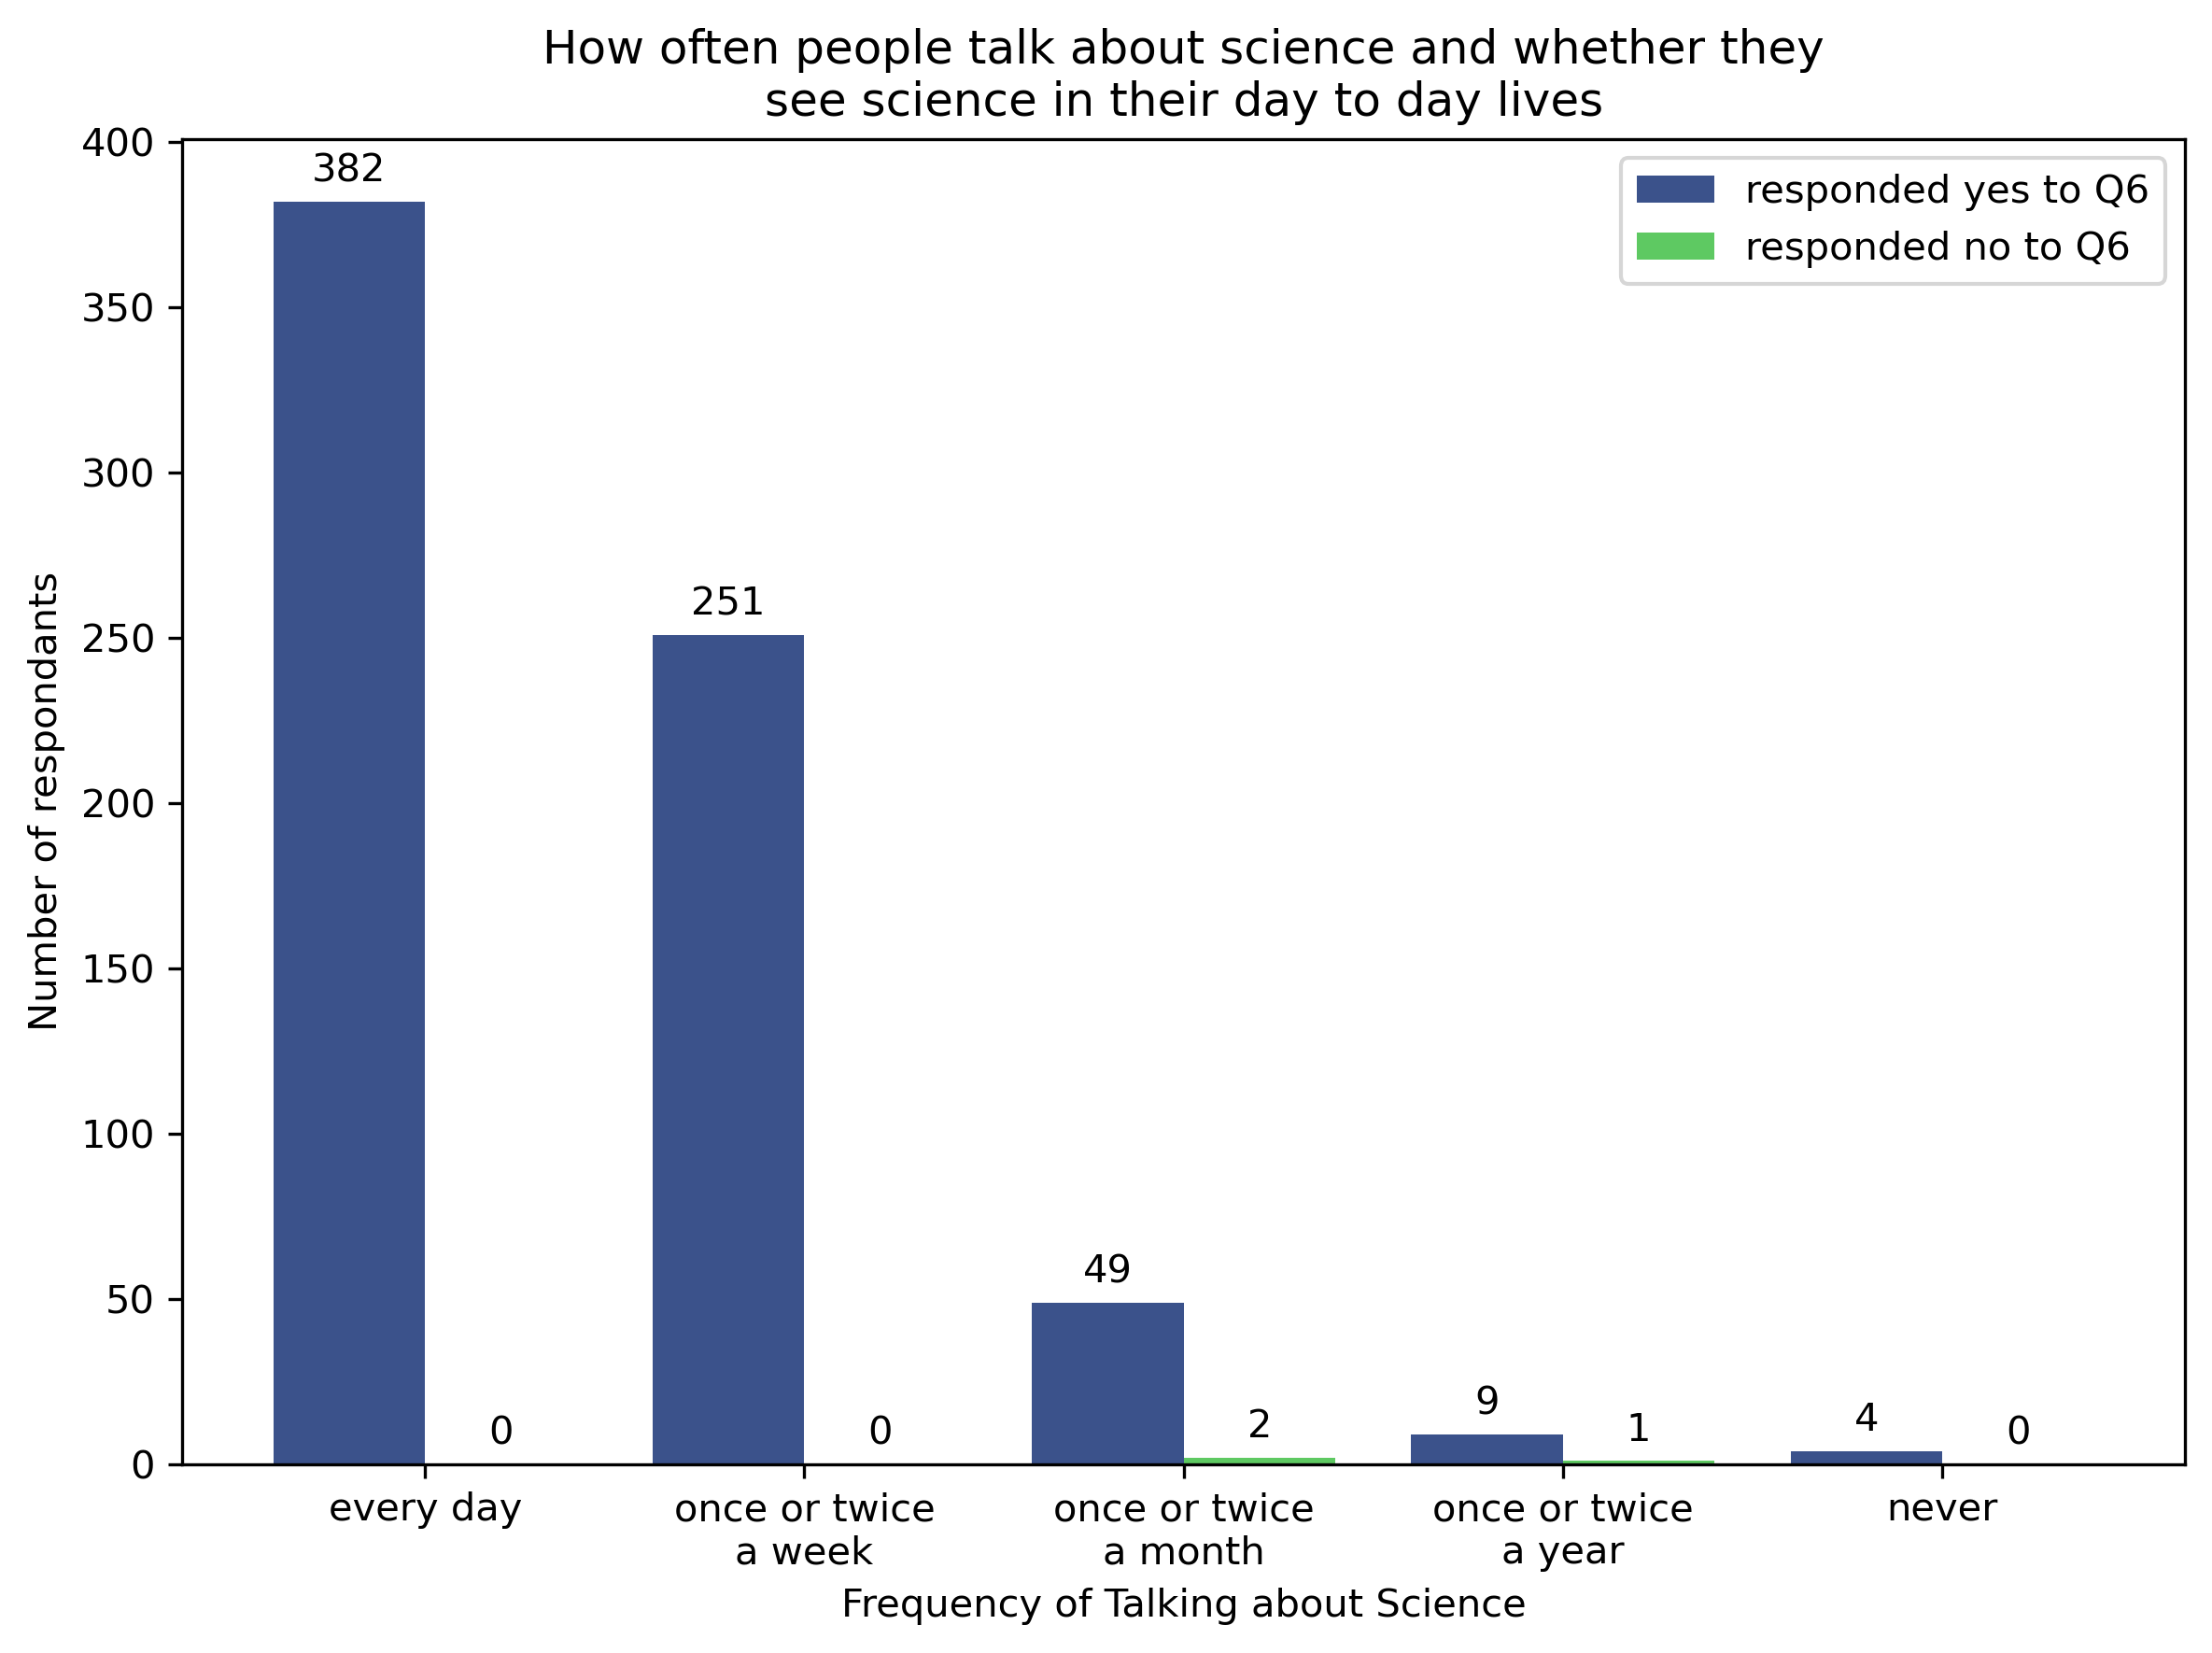

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

x = np.arange(len(df['Frequency']))  # the label locations
width = 0.40  # the width of the bars

bar1 = ax.bar(x - width/2, df['responded yes to Q6'], width=width, color=pl.cm.viridis(0.25), label='responded yes to Q6')
bar2 = ax.bar(x + width/2, df['responded no to Q6'], width=width, color=pl.cm.viridis(0.75), label='responded no to Q6')
ax.set_xlabel('Frequency of Talking about Science')
ax.set_xticks(x)
ax.set_xticklabels(df['Frequency'])

ax.set_ylabel('Number of respondants')
ax.set_title("How often people talk about science and whether they\nsee science in their day to day lives")

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

#Set labeles out at the moment
autolabel(bar1)
autolabel(bar2)

#legend dohicky
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.tight_layout()
plt.savefig('figures/TalkingandSeeingScience.png')
plt.show()